<a id='top'></a>
# Aggregating points from Teranet dataset by Dissimination Areas (DA)

## Proposed Future Workflow


This notebook presents proposed future workflow for joining various DA-based information with aggregates from Teranet dataset. 

### The proposed workflow goes as follows (similar to querying a database): 

1. Teranet dataset with `'da_id'` column and a shapefile with DA information is loaded.


2. An aggregate (sum, count, mean, median, some map) is produced by dissimination area using `'da_id'` column for grouping.


3. Teranet aggregate is JOINed with the shapefile containing DA information and geometry.


4. Results can be plotted and analyzed.


---
## Table of contents
---


0. [Preparations](#preparations)

[Workflow](#workflow)

1. [Example 1: Map Counts of all Teranet records per Dissimination Area](#map_counts)


2. [Example 2: Map Median Price per DA for 2017 (filter outliers > $5'000'000)](#map_price)


3. [Investigating pins of condos in the downtown area](#condos_pins)

<a id='preparations'></a>
## 0. Preparations

Back to the [top](#top)

0.1 [Import libraries](#import_libraries)

0.2 [Load the dataset containing Dissimination Areas](#load_da_gdf)

0.3 [Load Teranet dataset with Dissimination Areas (verify path)](#load_teranet)

<a id='import_libraries'></a>
### 0.1 Import libraties

Back to [section 0](#preparations) / Back to the [top](#top)

In [1]:
from IPython.display import IFrame, HTML
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
import pysal as ps

C:\Anaconda3\envs\gds\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


<a id='load_da_gdf'></a>
### 0.2 Load the dataset containing Dissimination Areas

Back to [section 0](#preparations) / Back to the [top](#top)

#### Profile of Income by Dissemination Area - Greater Toronto Area, 2016 Census

About  
York Region - Open Data   
Shared By: YorkMunicipalGovt   
Data Source: services1.arcgis.com 

https://hub.arcgis.com/datasets/9d262f8a576842fbb2afbc8c51a64178_1

In [2]:
url = 'https://hub.arcgis.com/datasets/9d262f8a576842fbb2afbc8c51a64178_1'
IFrame(url, 900, 500)

#### Description of the dataset can be found [here](https://www12.statcan.gc.ca/census-recensement/2016/ref/98-501/98-501-x2016006-eng.cfm):

In [3]:
HTML('https://www12.statcan.gc.ca/census-recensement/2016/ref/98-501/98-501-x2016006-eng.cfm')

#### Load the GeoDataFrame with Dissimination Areas from ArcGIS Open Data API

GeoDataFrame 'da_income_gdf' with profile of income by dissimination areas created!
Wall time: 49.4 s


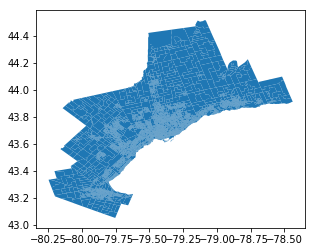

In [4]:
%%time
api_url = 'https://opendata.arcgis.com/datasets/9d262f8a576842fbb2afbc8c51a64178_1.geojson'
da_income_gdf = gpd.read_file(api_url)
print("GeoDataFrame 'da_income_gdf' with profile of income by dissimination areas created!")
da_income_gdf.plot();

In [5]:
da_income_gdf.sort_values(by='OBJECTID')

OBJECTID     DAUID   CSDUID    CSDNAME  POP_TOT_INC  NUM_TOT_INC_PVT_HH  \
3000         1  35180171  3518013     Oshawa        410.0               390.0   
3001         2  35180172  3518013     Oshawa        600.0               565.0   
3002         3  35180173  3518013     Oshawa        435.0               415.0   
3003         4  35180174  3518013     Oshawa        395.0               380.0   
3004         5  35180175  3518013     Oshawa        390.0               365.0   
3005         6  35180305  3518009     Whitby        370.0               340.0   
3006         7  35180306  3518009     Whitby        435.0               410.0   
3007         8  35180307  3518009     Whitby        430.0               415.0   
3008         9  35180309  3518013     Oshawa        460.0               445.0   
3009        10  35180310  3518013     Oshawa        560.0               540.0   
3010        11  35180311  3518013     Oshawa        595.0               570.0   
3011        12  35180229  3518009     Whitby        465.0               450.0   
3012        13  35180230  3518009     Whitby        295.0               285.0   
3013        14  35180487  3518001  Pickering        245.0               240.0   
3014        15  35180488  3518001  Pickering        750.0               715.0   
3015        16  35180489  3518001  Pickering        285.0               270.0   
3016        17  35180490  3518001  Pickering        885.0               845.0   
3017        18  35180491  3518001  Pickering        345.0               325.0   
3018        19  35180492  3518001  Pickering        545.0               500.0   
3019        20  35180493  3518001  Pickering        710.0               675.0   
3020        21  35180494  3518001  Pickering        515.0               500.0   
3021        22  35180495  3518001  Pickering        410.0               390.0   
3022        23  35180496  3518001  Pickering        710.0               675.0   
3023        24  35180497  3518001  Pickering        600.0               570.0   
3024        25  35180498  3518001  Pickering        480.0               445.0   
3025        26  35180177  3518013     Oshawa        490.0               465.0   
3026        27  35180179  3518013     Oshawa        445.0               430.0   
3027        28  35180231  3518009     Whitby        345.0               335.0   
3028        29  35180232  3518009     Whitby        310.0               300.0   
3029        30  35180233  3518009     Whitby        380.0               365.0   
...        ...       ...      ...        ...          ...                 ...   
6152      9153  35250586  3525005   Hamilton       1205.0              1125.0   
6153      9154  35250631  3525005   Hamilton        425.0               405.0   
6154      9155  35250632  3525005   Hamilton        540.0               510.0   
6155      9156  35250633  3525005   Hamilton        225.0                 NaN   
6156      9157  35250634  3525005   Hamilton        580.0               550.0   
6157      9158  35250488  3525005   Hamilton        375.0               360.0   
6158      9159  35250489  3525005   Hamilton        310.0               295.0   
6159      9160  35250490  3525005   Hamilton        350.0               330.0   
6160      9161  35250491  3525005   Hamilton        230.0               200.0   
6161      9162  35250492  3525005   Hamilton        305.0               295.0   
6162      9163  35250493  3525005   Hamilton        330.0               320.0   
6163      9164  35250951  3525005   Hamilton        470.0               455.0   
6164      9165  35250952  3525005   Hamilton       1570.0              1525.0   
6165      9166  35250953  3525005   Hamilton        315.0               295.0   
6166      9167  35250217  3525005   Hamilton        485.0               460.0   
6167      9168  35250218  3525005   Hamilton        470.0               430.0   
6168      9169  35250221  3525005   Hamilton        505.0               485.0   
6169      9170  35250222  3525005   H

<a id='load_teranet'></a>
### 0.3 Load Teranet dataset with Dissimination Areas (verify path)

Back to [section 0](#preparations) / Back to the [top](#top)

> If the script is run from this point, Teranet dataset needs to be loaded into a DataFrame. 

> File path to Teranet dataset needs to be verified. '..' means one directory up from the location of this notebook.

In [6]:
%%time

# verify the path to Teranet dataset
save_file_path = '../Data/HHSaleHistory_cleaned_v0.9_GTHA_DA.csv'   # .. means one directory up from current location 

# read Teranet dataset with a column containing Dissimination Areas id
teranet_da_df = pd.read_csv(save_file_path)

# drop unnecessary columns
teranet_da_df.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

# covert 'registration_date' to datetime data format
teranet_da_df['registration_date'] = pd.to_datetime(teranet_da_df['registration_date'])

print("Teranet sales data with Dissimination Areas info was loaded into DataFrame 'teranet_da_df'!")

Teranet sales data with Dissimination Areas info was loaded into DataFrame 'teranet_da_df'!
Wall time: 52 s


---
<a id='workflow'></a>
## Worklow: JOIN the Teranet data aggregated by DA ids to GeoDataFrame with Dissimination Areas

Back to the [top](#top)

---

From [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html):

pandas has full-featured, **high performance** in-memory join operations idiomatically very similar to relational databases like SQL. These methods perform significantly better (in some cases well over an order of magnitude better) than other open source implementations (like base::merge.data.frame in R). The reason for this is careful algorithmic design and the internal layout of the data in DataFrame.

---

1. Use Teranet dataset with DA information to aggregate statistics of sales (count of transactions, min, max, mean, median price, _etc._). 


2. Assign these statistics to GeoDataFrame of Dissimination Areas.


3. Plot maps of aggregate statistics by dissimination areas.

<a id='map_counts'></a>
## 1. Example: Map Count of all Teranet records per Dissimination Area

Back to the [top](#top)

1.1 [Make an aggregate from Teranet data -- count of records per DA](#teranet_aggregate)

1.2 [Perform the JOIN operation](#teranet_da_join)

1.3 [Plot results -- Count of Teranet records per Dissimination Area](#plot_results_counts)

<a id='teranet_aggregate'></a>
### 1.1 Make an aggregate from Teranet data -- count of records per DA

Back to [section 1](#map_counts) / Back to the [top](#top)

#### 1.1.1 Create a GroupBy object from Teranet dataset grouped by Dissimination Area id

In [8]:
da_groups = teranet_da_df.groupby(by='da_id')
print("Created GroupBy object 'da_groups' containing teranet sales records grouped by DA ids.")

Created GroupBy object 'da_groups' containing teranet sales records grouped by DA ids.


#### 1.1.2 Make an aggregate (count of all records) from Teranet data

In [9]:
teranet_aggregate = pd.DataFrame(da_groups['registration_date'].count())
print("Done!")

Done!


<a id='teranet_da_join'></a>
### 1.2 Perform the JOIN operation

Back to [section 1](#map_counts) / Back to the [top](#top)

#### 1.2.1 Key to be used for the JOIN in Teranet DA groups (`'index'` of GroupBy object)

In [10]:
teranet_aggregate.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            9173, 9174, 9175, 9176, 9177, 9178, 9179, 9180, 9181, 9182],
           dtype='int64', name='da_id', length=9168)

#### 1.2.2 Key to be used for the JOIN in GeoDataFrame with Dissimination Areas (column `'OBJECTID'`)

In [11]:
da_income_gdf[['OBJECTID']].sort_values(by='OBJECTID')

OBJECTID
3000         1
3001         2
3002         3
3003         4
3004         5
3005         6
3006         7
3007         8
3008         9
3009        10
3010        11
3011        12
3012        13
3013        14
3014        15
3015        16
3016        17
3017        18
3018        19
3019        20
3020        21
3021        22
3022        23
3023        24
3024        25
3025        26
3026        27
3027        28
3028        29
3029        30
...        ...
6152      9153
6153      9154
6154      9155
6155      9156
6156      9157
6157      9158
6158      9159
6159      9160
6160      9161
6161      9162
6162      9163
6163      9164
6164      9165
6165      9166
6166      9167
6167      9168
6168      9169
6169      9170
6170      9171
6171      9172
6172      9173
6173      9174
6174      9175
6175      9176
6176      9177
6177      9178
6178      9179
6179      9180
6180      9181
6181      9182

[9182 rows x 1 columns]

#### 1.2.3 Perform the JOIN operation

In [12]:
%%time
teranet_column_name = 'registration_date'
new_column_name = 'teranet_sales_count'

# save projection information from GeoDataFrame with DAs
crs = da_income_gdf.crs

# JOIN Teranet aggregate to GeoDataFrame with DAs (produces a DataFrame)
teranet_da_gdf = pd.merge(teranet_aggregate,
                          da_income_gdf,
                          left_on=teranet_aggregate.index,
                          right_on=da_income_gdf['OBJECTID'])

# rename the column containing aggregate Teranet information
teranet_da_gdf.rename(columns={teranet_column_name:new_column_name}, inplace=True)

# convert DataFrame to GeoDataFrame
teranet_da_gdf = gpd.GeoDataFrame(teranet_da_gdf, 
                                  geometry=teranet_da_gdf['geometry'])
# add projection information to the new GeoDataFrame
teranet_da_gdf.crs = crs

print("Teranet data aggregate JOINED to GeoDataFrame with Dissimination Areas!")

Teranet data aggregate JOINED to GeoDataFrame with Dissimination Areas!
Wall time: 75.1 ms


<a id='plot_results_counts'></a>
### 1.3 Plot results -- Count of Teranet records per Dissimination Area

Back to [section 1](#map_counts) / Back to the [top](#top)

1.3.1 [Splitting the distribution using Quantiles](#counts_quantiles)

1.3.2 [Split using Equal Distribution](#counts_equal_distribution)

1.3.3 [Split using Fisher-Jenks optimization method](#counts_fisher_jenks)

<a id='counts_quantiles'></a>
#### 1.3.1 Splitting the distribution using Quantiles

Back to [section 1.3](#plot_results_counts) / Back to [section 1](#map_counts) / Back to the [top](#top)

> * Good for analyzing distribution among DAs with **lower sales density**
>
>
> * Equal number of DAs in each category
>
>
> * Top quantile covers a huge range: DAs with 894 - 20'199 sales records

In [13]:
column_to_plot = 'teranet_sales_count'

In [14]:
num_bins = 7

classi = ps.Quantiles(teranet_da_gdf[column_to_plot], k=num_bins)
classi

C:\Anaconda\envs\gds\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


                   Quantiles                    
 
  Lower              Upper                 Count
            x[i] <=   235.000               1313
  235.000 < x[i] <=   323.000               1313
  323.000 < x[i] <=   392.714               1303
  392.714 < x[i] <=   472.286               1310
  472.286 < x[i] <=   589.000               1310
  589.000 < x[i] <=   894.000               1311
  894.000 < x[i] <= 20199.000               1308

#### Quantiles -- KDE of Count of Teranet records

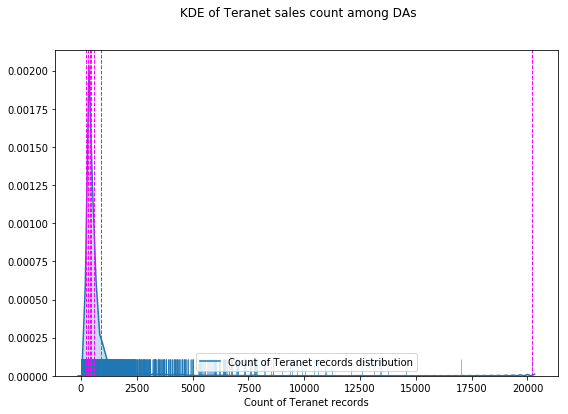

In [15]:
f, ax = plt.subplots(1, figsize=(9, 6))
f.suptitle("KDE of Teranet sales count among DAs")
ax.set_xlabel("Count of Teranet records")
sns.kdeplot(teranet_da_gdf[column_to_plot], shade=True, label='Count of Teranet records distribution')
sns.rugplot(teranet_da_gdf[column_to_plot], alpha=0.5)
ax.legend(loc='best')
for classi_bin in classi.bins:
    ax.axvline(classi_bin, color='magenta', linewidth=1, linestyle='--')
plt.show()

#### Quantiles -- map

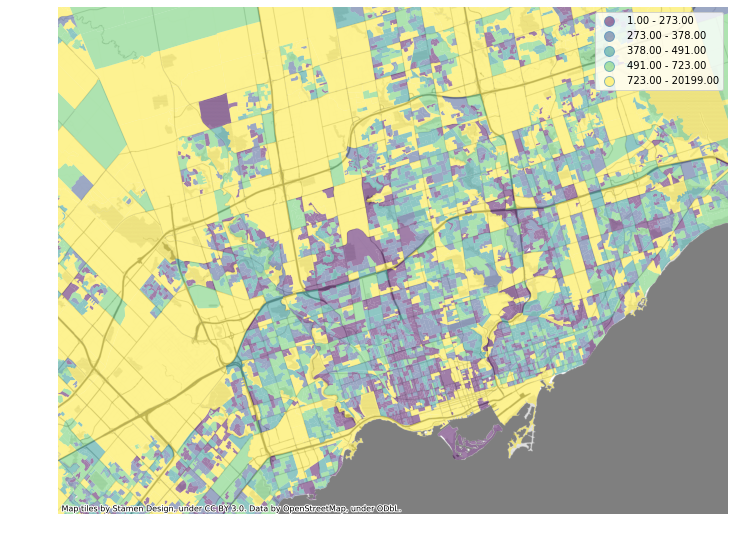

In [16]:
f, ax = plt.subplots(1, figsize=(12, 12))

teranet_da_gdf.to_crs(epsg=3857).plot(
                                      column='teranet_sales_count',
                                      scheme='quantiles',
                                      ax=ax, 
                                      legend=True,
                                      alpha=0.5
                                      )

# zoom the map to Toronto
minx, miny, maxx, maxy = teranet_da_gdf.to_crs(epsg=3857).total_bounds
minx = minx + (maxx - minx) / 3.5
maxx = maxx - (maxx - minx) / 1.8
miny = miny + (maxy - miny) / 2.8
maxy = maxy - (maxy - miny) / 1.5

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND, alpha=0.5)
ax.set_axis_off()
plt.show()

<a id='counts_equal_distribution'></a>
#### 1.3.2 Split using Equal Distribution

Back to [section 1.3](#plot_results_counts) / Back to [section 1](#map_counts) / Back to the [top](#top)

> * Good for analyzing distribution of DAs with **high sales density**
>
>
> * Equal interval in counts between categories
>
>
> * Vast majority of DAs have lower sales density compared to "outliers"
>
>
> * Highlights the areas with very high sales density

In [17]:
num_bins = 7

classi = ps.Equal_Interval(teranet_da_gdf[column_to_plot], k=num_bins)
classi

                 Equal Interval                 
 
  Lower              Upper                 Count
            x[i] <=  2886.429               8911
 2886.429 < x[i] <=  5771.857                180
 5771.857 < x[i] <=  8657.286                 57
 8657.286 < x[i] <= 11542.714                 11
11542.714 < x[i] <= 14428.143                  6
14428.143 < x[i] <= 17313.571                  2
17313.571 < x[i] <= 20199.000                  1

#### Equal Distribution -- KDE of Count of Teranet records

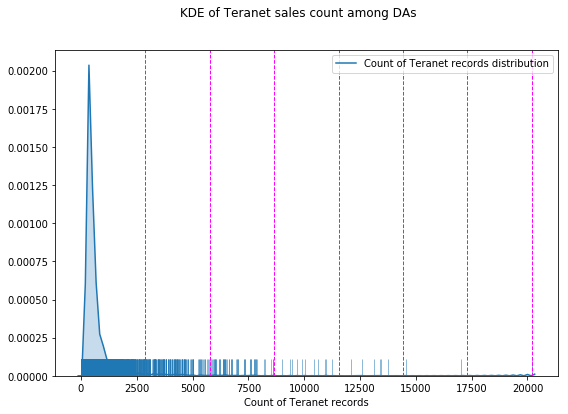

In [18]:
f, ax = plt.subplots(1, figsize=(9, 6))
f.suptitle("KDE of Teranet sales count among DAs")
ax.set_xlabel("Count of Teranet records")
sns.kdeplot(teranet_da_gdf[column_to_plot], shade=True, label='Count of Teranet records distribution')
sns.rugplot(teranet_da_gdf[column_to_plot], alpha=0.5)
ax.legend(loc='best')
for classi_bin in classi.bins:
    ax.axvline(classi_bin, color='magenta', linewidth=1, linestyle='--')
plt.show()

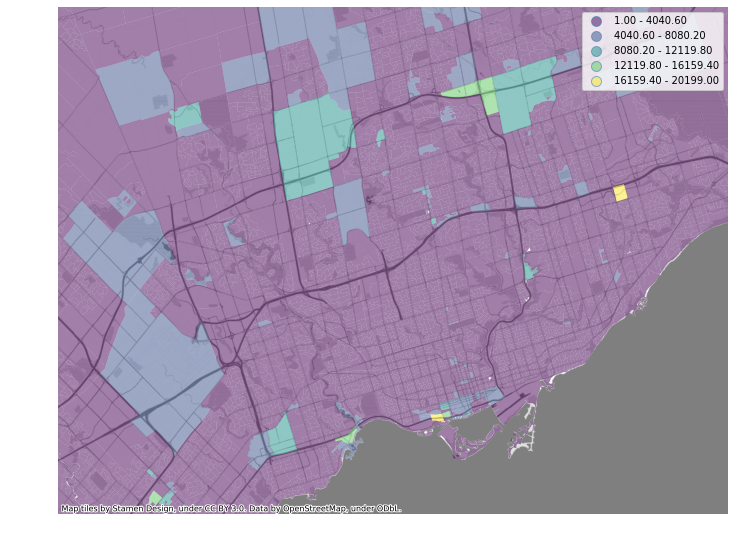

In [19]:
f, ax = plt.subplots(1, figsize=(12, 12))

teranet_da_gdf.to_crs(epsg=3857).plot(
                                      column='teranet_sales_count',
                                      scheme='equal_interval',
                                      ax=ax, 
                                      legend=True,
                                      alpha=0.5
                                      )

# zoom the map to Toronto
minx, miny, maxx, maxy = teranet_da_gdf.to_crs(epsg=3857).total_bounds
minx = minx + (maxx - minx) / 3.5
maxx = maxx - (maxx - minx) / 1.8
miny = miny + (maxy - miny) / 2.8
maxy = maxy - (maxy - miny) / 1.5

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND, alpha=0.5)
ax.set_axis_off()
plt.show()

<a id='counts_fisher_jenks'></a>
#### 1.3.3 Split using Fisher-Jenks optimization method

Back to [section 1.3](#plot_results_counts) / Back to [section 1](#map_counts) / Back to the [top](#top)

> * Balanced approach
>
>
> * Finds "natural" breaks in the distribution

In [20]:
num_bins = 7

classi = ps.Fisher_Jenks(teranet_da_gdf[column_to_plot], k=num_bins)
classi

                  Fisher_Jenks                  
 
  Lower              Upper                 Count
            x[i] <=   433.000               4599
  433.000 < x[i] <=   892.000               3256
  892.000 < x[i] <=  1746.000                814
 1746.000 < x[i] <=  3185.000                269
 3185.000 < x[i] <=  5563.000                150
 5563.000 < x[i] <= 10015.000                 66
10015.000 < x[i] <= 20199.000                 14

#### KDE of Count of Teranet records

C:\Anaconda\envs\gds\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


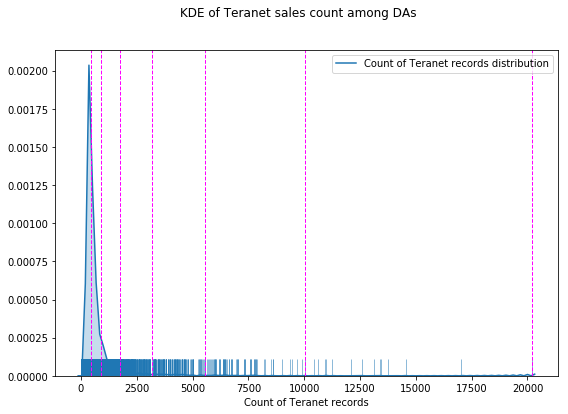

In [21]:
f, ax = plt.subplots(1, figsize=(9, 6))
f.suptitle("KDE of Teranet sales count among DAs")
ax.set_xlabel("Count of Teranet records")
sns.kdeplot(teranet_da_gdf[column_to_plot], shade=True, label='Count of Teranet records distribution')
sns.rugplot(teranet_da_gdf[column_to_plot], alpha=0.5)
ax.legend(loc='best')
for classi_bin in classi.bins:
    ax.axvline(classi_bin, color='magenta', linewidth=1, linestyle='--')
plt.show()

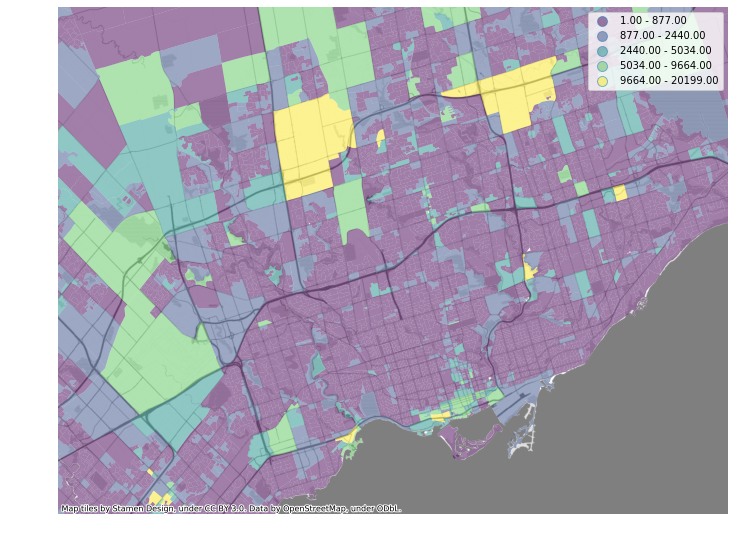

In [22]:
f, ax = plt.subplots(1, figsize=(12, 12))

teranet_da_gdf.to_crs(epsg=3857).plot(
                                      column='teranet_sales_count',
                                      scheme='fisher_jenks',
                                      ax=ax, 
                                      legend=True,
                                      alpha=0.5
                                      )

# zoom the map to Toronto
minx, miny, maxx, maxy = teranet_da_gdf.to_crs(epsg=3857).total_bounds
minx = minx + (maxx - minx) / 3.5
maxx = maxx - (maxx - minx) / 1.8
miny = miny + (maxy - miny) / 2.8
maxy = maxy - (maxy - miny) / 1.5

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND, alpha=0.5)
ax.set_axis_off()
plt.show()

<a id='map_price'></a>
## Example 2: plot Median Price per DA for 2017 (filter outliers > \$5'000'000)

Back to the [top](#top)

2.1 [Create a subset of Teranet data for 2017, with outliers above \$5'000'000 removed](#price_create_subset)

<a id='price_create_subset'></a>
### 2.1 Create a subset of Teranet data for 2017, with outliers above \$5'000'000 removed

In [19]:
%%time
# set the start and end date for Teranet subset
start_date = '2017-01-01'
end_date = '2017-12-31'

# create the Teranet subset using the dates
teranet_da_subset_df = teranet_da_df.set_index('registration_date') \
                                    .sort_index()

teranet_da_subset_df = teranet_da_subset_df.loc[start_date:end_date] \
                                           .reset_index()

# remove outliers above $5'000'000
teranet_da_subset_df.query('consideration_amt < 5000000', inplace=True)

print("Subset 'teranet_da_subset_df' created with {0:,} records,\nstarting from '{1}' to '{2}'.\n"
     .format(len(teranet_da_subset_df),
             start_date,
             end_date))

Subset 'teranet_da_subset_df' created with 151,825 records,
starting from '2017-01-01' to '2017-12-31'.

Wall time: 11.2 s


In [20]:
teranet_da_subset_df.head()

registration_date  decade  year  lro_num        pin  consideration_amt  \
0        2017-01-03     201  2017       65   36040180           830000.0   
1        2017-01-03     201  2017       80  761530078           400000.0   
2        2017-01-03     201  2017       65   36231147          1280000.0   
3        2017-01-03     201  2017       20  254770158           424500.0   
4        2017-01-03     201  2017       65  297870276           388000.0   

  postal_code province  unitno   street_name        ...         \
0      L3Y2H2       ON     NaN         Queen        ...          
1      M8Y0A7       ON   803.0        Legion        ...          
2      L3X2J8       ON     NaN          Best        ...          
3      L7L5V7       ON     NaN      Pinedale        ...          
4      L4G0S6       ON     NaN  Civic Square        ...          

  street_direction municipality street_suffix  street_number          x  \
0              NaN    Newmarket           NaN          426.0 -79.460224   
1                N    Etobicoke           NaN          155.0 -79.488201   
2              NaN    Newmarket           NaN          828.0 -79.441398   
3              NaN   Burlington           NaN         5080.0 -79.752604   
4              NaN       Aurora           NaN          111.0 -79.449480   

           y  index_right  da_id     da_city da_median_tot_inc  
0  44.055874          135   3136   Newmarket           34987.0  
1  43.624146         8332   7151     Toronto           49543.0  
2  44.033206         1750   1751   Newmarket           39648.0  
3  43.371986         8981   7800  Burlington           35552.0  
4  44.009016         5130   4131      Aurora           42704.0  

[5 rows x 21 columns]

### Make an aggregate from Teranet data -- mean price per DA

#### Create a GroupBy object from the subset of Teranet dataset grouped by Dissimination Area id

In [21]:
da_groups = teranet_da_subset_df.groupby(by='da_id')
print("Created GroupBy object 'da_groups' containing teranet sales records grouped by DA ids.")

Created GroupBy object 'da_groups' containing teranet sales records grouped by DA ids.


#### Make an aggregate (mean price per DA for 2017 subset) from Teranet data

In [22]:
teranet_aggregate = pd.DataFrame(da_groups['consideration_amt'].median())
print("Done!")

Done!


#### Key to be used for the JOIN in Teranet DA groups (`'index'` of GroupBy object)

In [27]:
teranet_aggregate.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            9173, 9174, 9175, 9176, 9177, 9178, 9179, 9180, 9181, 9182],
           dtype='int64', name='da_id', length=8699)

#### Key to be used for the JOIN in GeoDataFrame with Dissimination Areas (column `'OBJECTID'`)

In [28]:
da_income_gdf[['OBJECTID']].sort_values(by='OBJECTID')

OBJECTID
3000         1
3001         2
3002         3
3003         4
3004         5
3005         6
3006         7
3007         8
3008         9
3009        10
3010        11
3011        12
3012        13
3013        14
3014        15
3015        16
3016        17
3017        18
3018        19
3019        20
3020        21
3021        22
3022        23
3023        24
3024        25
3025        26
3026        27
3027        28
3028        29
3029        30
...        ...
6152      9153
6153      9154
6154      9155
6155      9156
6156      9157
6157      9158
6158      9159
6159      9160
6160      9161
6161      9162
6162      9163
6163      9164
6164      9165
6165      9166
6166      9167
6167      9168
6168      9169
6169      9170
6170      9171
6171      9172
6172      9173
6173      9174
6174      9175
6175      9176
6176      9177
6177      9178
6178      9179
6179      9180
6180      9181
6181      9182

[9182 rows x 1 columns]

#### Perform the JOIN operation

In [23]:
%%time
teranet_column_name = 'consideration_amt'
new_column_name = 'teranet_median_price'

# save projection information from GeoDataFrame with DAs
crs = da_income_gdf.crs

# JOIN Teranet aggregate to GeoDataFrame with DAs (produces a DataFrame)
teranet_da_gdf = pd.merge(teranet_aggregate,
                          da_income_gdf,
                          left_on=teranet_aggregate.index,
                          right_on=da_income_gdf['OBJECTID'])

# rename the column containing aggregate Teranet information
teranet_da_gdf.rename(columns={teranet_column_name:new_column_name}, inplace=True)

# convert DataFrame to GeoDataFrame
teranet_da_gdf = gpd.GeoDataFrame(teranet_da_gdf, 
                                  geometry=teranet_da_gdf['geometry'])
# add projection information to the new GeoDataFrame
teranet_da_gdf.crs = crs

print("Teranet data aggregate JOINED to GeoDataFrame with Dissimination Areas!\n")
print("New column '{0}' was added to GeoDataFrame with Dissimination Areas.\n"
     .format(new_column_name))

Teranet data aggregate JOINED to GeoDataFrame with Dissimination Areas!

New column 'teranet_median_price' was added to GeoDataFrame with Dissimination Areas.

Wall time: 126 ms


## Plot results

### Count of Teranet records per Dissimination Area

#### Splitting the distribution using Quantiles

> * Good for analyzing distribution among DAs with **lower sales density**
>
>
> * Equal number of DAs in each category
>
>
> * Top quantile covers a huge range: DAs with 894 - 20'199 sales records

In [24]:
column_to_plot = 'teranet_median_price'
kde_title = 'KDE of Teranet mean price among DAs'
kde_xlabel = 'Mean price'
kde_label = 'Teranet subset Mean Price distribution'

In [25]:
num_bins = 7

classi = ps.Quantiles(teranet_da_gdf[column_to_plot], k=num_bins)
classi

                     Quantiles                      
 
   Lower                Upper                  Count
              x[i] <=  455392.857               1243
 455392.857 < x[i] <=  597535.714               1243
 597535.714 < x[i] <=  708000.000               1245
 708000.000 < x[i] <=  827500.000               1244
 827500.000 < x[i] <= 1000000.000               1259
1000000.000 < x[i] <= 1346071.429               1222
1346071.429 < x[i] <= 4700000.000               1243

#### KDE of Count of Teranet records

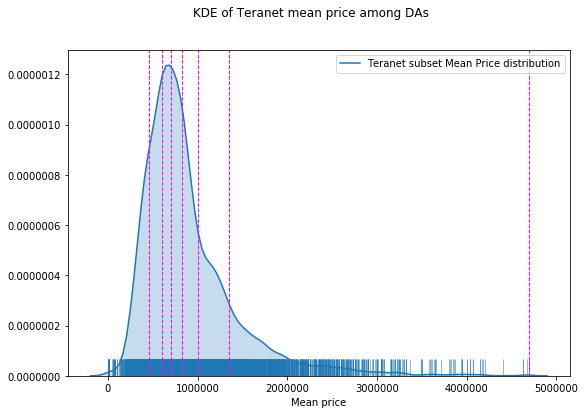

In [26]:
f, ax = plt.subplots(1, figsize=(9, 6))
f.suptitle(kde_title)
ax.set_xlabel(kde_xlabel)
sns.kdeplot(teranet_da_gdf[column_to_plot], shade=True, label=kde_label)
sns.rugplot(teranet_da_gdf[column_to_plot], alpha=0.5)
ax.legend(loc='best')
for classi_bin in classi.bins:
    ax.axvline(classi_bin, color='magenta', linewidth=1, linestyle='--')
plt.show()

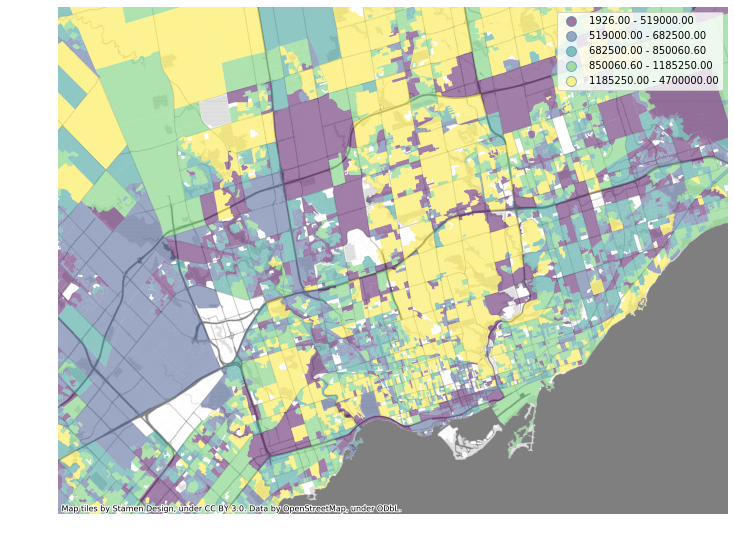

In [27]:
f, ax = plt.subplots(1, figsize=(12, 12))

teranet_da_gdf.to_crs(epsg=3857).dropna().plot(
                                               column=column_to_plot,
                                               scheme='quantiles',
                                               ax=ax, 
                                               legend=True,
                                               alpha=0.5
                                               )

# zoom the map to Toronto
minx, miny, maxx, maxy = teranet_da_gdf.to_crs(epsg=3857).total_bounds
minx = minx + (maxx - minx) / 3.5
maxx = maxx - (maxx - minx) / 1.8
miny = miny + (maxy - miny) / 2.8
maxy = maxy - (maxy - miny) / 1.5

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND, alpha=0.5)
ax.set_axis_off()
plt.show()

#### Split using Equal Distribution

> * Good for analyzing distribution of DAs with **high sales density**
>
>
> * Equal interval in counts between categories
>
>
> * Vast majority of DAs have lower sales density compared to "outliers"
>
>
> * Highlights the areas with very high sales density

In [34]:
num_bins = 7

classi = ps.Equal_Interval(teranet_da_gdf[column_to_plot], k=num_bins)
classi

                   Equal Interval                   
 
   Lower                Upper                  Count
              x[i] <=  673079.429               3352
 673079.429 < x[i] <= 1344232.857               4101
1344232.857 < x[i] <= 2015386.286                875
2015386.286 < x[i] <= 2686539.714                239
2686539.714 < x[i] <= 3357693.143                 91
3357693.143 < x[i] <= 4028846.571                 26
4028846.571 < x[i] <= 4700000.000                 15

#### KDE of Count of Teranet records

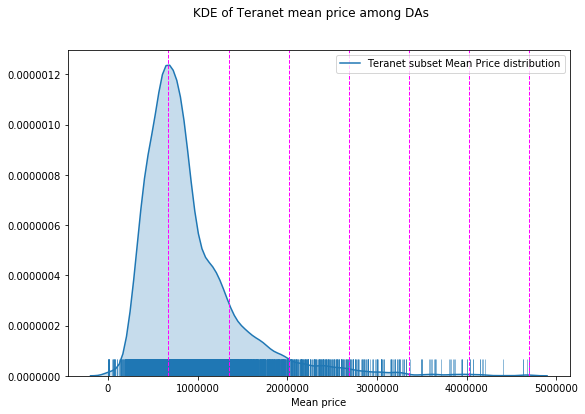

In [35]:
f, ax = plt.subplots(1, figsize=(9, 6))
f.suptitle(kde_title)
ax.set_xlabel(kde_xlabel)
sns.kdeplot(teranet_da_gdf[column_to_plot], shade=True, label=kde_label)
sns.rugplot(teranet_da_gdf[column_to_plot], alpha=0.5)
ax.legend(loc='best')
for classi_bin in classi.bins:
    ax.axvline(classi_bin, color='magenta', linewidth=1, linestyle='--')
plt.show()

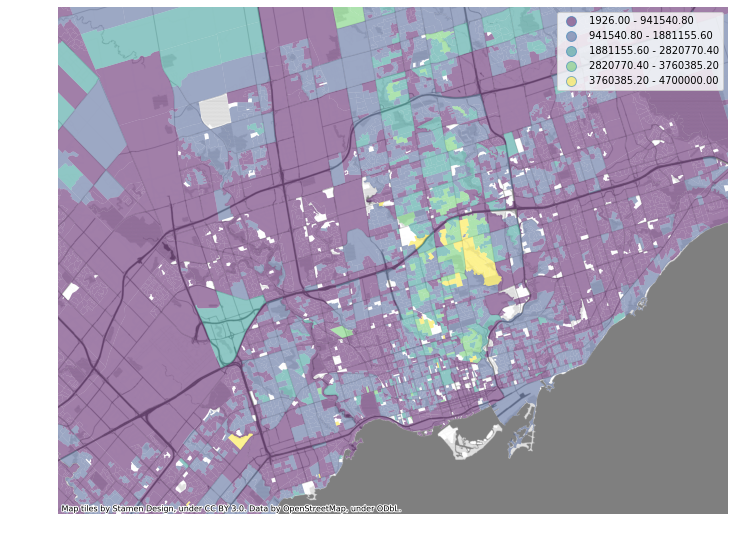

In [36]:
f, ax = plt.subplots(1, figsize=(12, 12))

teranet_da_gdf.to_crs(epsg=3857).plot(
                                      column=column_to_plot,
                                      scheme='equal_interval',
                                      ax=ax, 
                                      legend=True,
                                      alpha=0.5
                                      )

# zoom the map to Toronto
minx, miny, maxx, maxy = teranet_da_gdf.to_crs(epsg=3857).total_bounds
minx = minx + (maxx - minx) / 3.5
maxx = maxx - (maxx - minx) / 1.8
miny = miny + (maxy - miny) / 2.8
maxy = maxy - (maxy - miny) / 1.5

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND, alpha=0.5)
ax.set_axis_off()
plt.show()

#### Split using Fisher-Jenks optimization method

> * Balanced approach
>
>
> * Finds "natural" breaks in the distribution

In [37]:
num_bins = 7

classi = ps.Fisher_Jenks(teranet_da_gdf[column_to_plot], k=num_bins)
classi

                    Fisher_Jenks                    
 
   Lower                Upper                  Count
              x[i] <=  521000.000               1757
 521000.000 < x[i] <=  768450.000               2617
 768450.000 < x[i] <= 1062500.000               2097
1062500.000 < x[i] <= 1475000.000               1250
1475000.000 < x[i] <= 2079000.000                638
2079000.000 < x[i] <= 3010000.000                261
3010000.000 < x[i] <= 4700000.000                 79

#### KDE of Count of Teranet records

C:\Anaconda\envs\gds\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


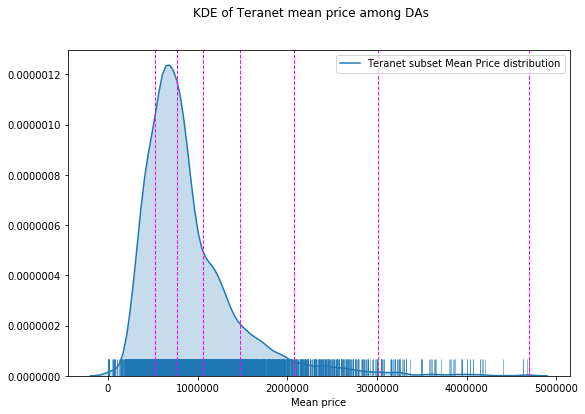

In [38]:
f, ax = plt.subplots(1, figsize=(9, 6))
f.suptitle(kde_title)
ax.set_xlabel(kde_xlabel)
sns.kdeplot(teranet_da_gdf[column_to_plot], shade=True, label=kde_label)
sns.rugplot(teranet_da_gdf[column_to_plot], alpha=0.5)
ax.legend(loc='best')
for classi_bin in classi.bins:
    ax.axvline(classi_bin, color='magenta', linewidth=1, linestyle='--')
plt.show()

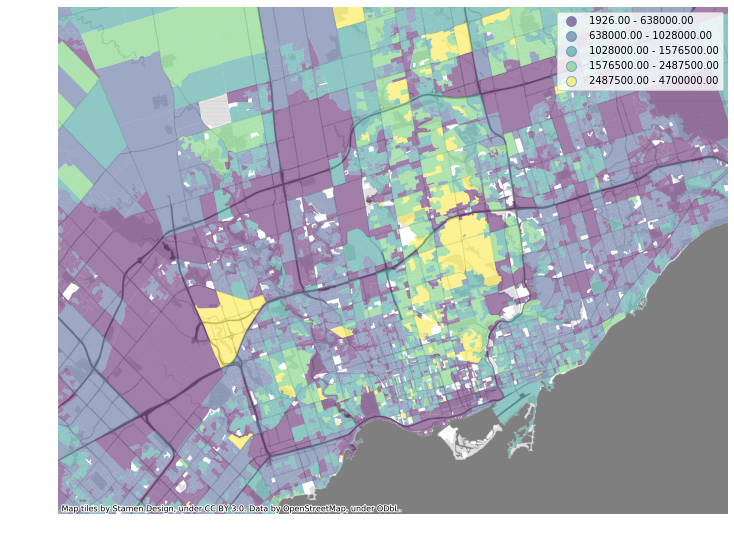

In [39]:
f, ax = plt.subplots(1, figsize=(12, 12))

teranet_da_gdf.to_crs(epsg=3857).plot(
                                      column=column_to_plot,
                                      scheme='fisher_jenks',
                                      ax=ax, 
                                      legend=True,
                                      alpha=0.5
                                      )

# zoom the map to Toronto
minx, miny, maxx, maxy = teranet_da_gdf.to_crs(epsg=3857).total_bounds
minx = minx + (maxx - minx) / 3.5
maxx = maxx - (maxx - minx) / 1.8
miny = miny + (maxy - miny) / 2.8
maxy = maxy - (maxy - miny) / 1.5

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND, alpha=0.5)
ax.set_axis_off()
plt.show()

#### Relationship between Median Price from Teranet and Median Total Income from Census, per DA

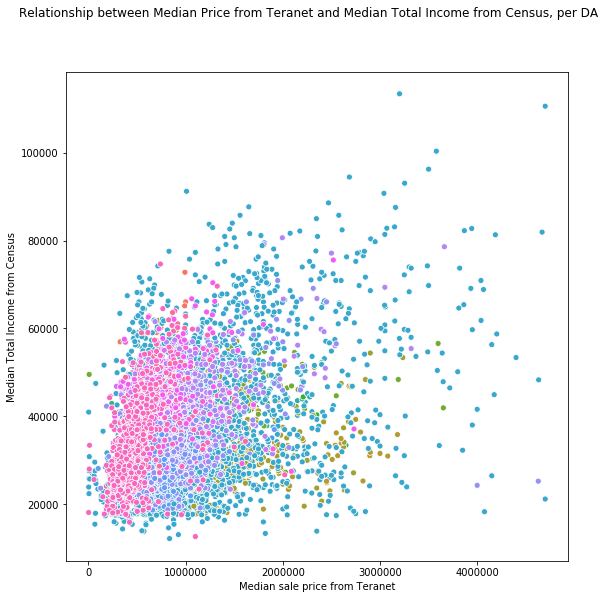

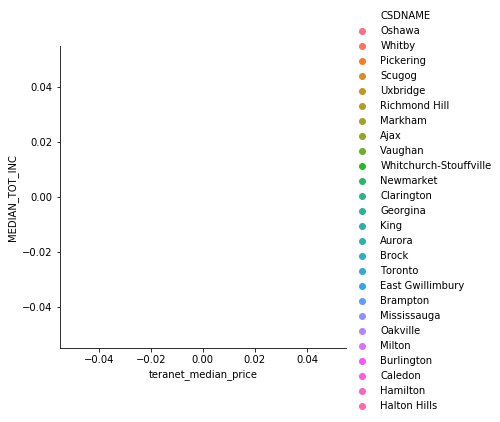

In [57]:
f, ax = plt.subplots(1, figsize=(9, 9))
f.suptitle('Relationship between Median Price from Teranet and Median Total Income from Census, per DA')
sns.relplot(data=teranet_da_gdf, 
                 x=column_to_plot, 
                 y='MEDIAN_TOT_INC', 
                 hue='CSDNAME',
                 ax=ax)
ax.set_xlabel('Median sale price from Teranet')
ax.set_ylabel('Median Total Income from Census')
plt.show()

#### Manual coloring of categories

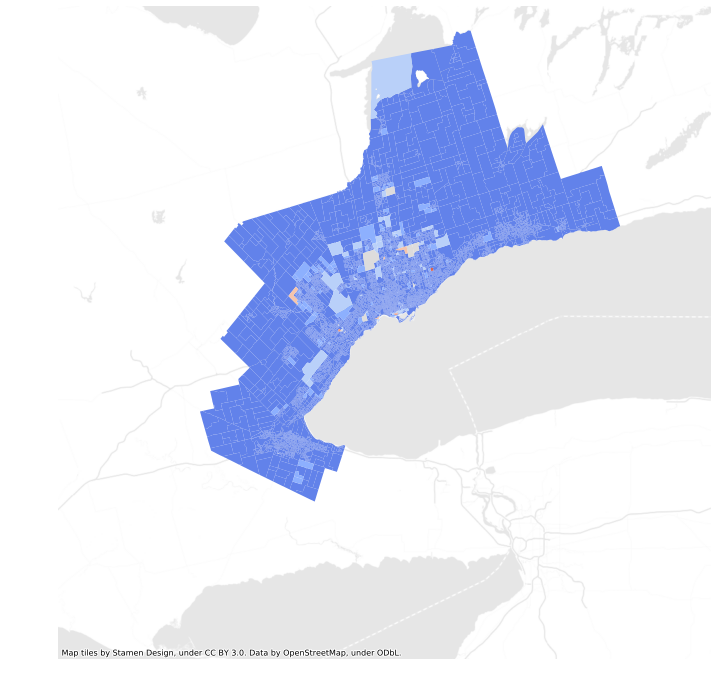

In [61]:
# create a list of colors
colors = sns.color_palette('coolwarm', num_bins)

# generate figure and axis
f, ax = plt.subplots(1, figsize=(12, 12))

# select each group and plot using colors from the list
for i in np.arange(num_bins):
    ax = teranet_da_gdf.to_crs(epsg=3857).assign(yb=classi.yb).query('yb == ' + str(i)).plot(color=colors[i], ax=ax)

ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND, alpha=0.1)

ax.set_axis_off()
plt.show()